Data Loading...


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Prostate_Cancer_Dataset.csv to Prostate_Cancer_Dataset.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Prostate_Cancer_Dataset.csv']))
print(df.head())
df.head(),df.info()

   radius  texture  perimeter    area  smoothness  compactness  symmetry  \
0    23.0     12.0      151.0   954.0       0.143        0.278     0.242   
1     9.0     13.0      133.0  1326.0       0.143        0.079     0.181   
2    21.0     27.0      130.0  1203.0       0.125        0.160     0.207   
3    14.0     16.0       78.0   386.0       0.070        0.284     0.260   
4     9.0     19.0      135.0  1297.0       0.141        0.133     0.181   

   fractal_dimension diagnosis_result  
0              0.079                M  
1              0.057                B  
2              0.060                M  
3              0.097                M  
4              0.059                M  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             600 non-null    float64
 1   texture            600 non-null    float64
 2   pe

(   radius  texture  perimeter    area  smoothness  compactness  symmetry  \
 0    23.0     12.0      151.0   954.0       0.143        0.278     0.242   
 1     9.0     13.0      133.0  1326.0       0.143        0.079     0.181   
 2    21.0     27.0      130.0  1203.0       0.125        0.160     0.207   
 3    14.0     16.0       78.0   386.0       0.070        0.284     0.260   
 4     9.0     19.0      135.0  1297.0       0.141        0.133     0.181   
 
    fractal_dimension diagnosis_result  
 0              0.079                M  
 1              0.057                B  
 2              0.060                M  
 3              0.097                M  
 4              0.059                M  ,
 None)

Data Processing and Data Preprocessing

data separation as y


In [ ]:
y = df['diagnosis_result']
y

,diagnosis_result
0,M
1,B
2,M
3,M
4,M
...,...
595,B
596,B
597,B
598,M


data separation as x

In [ ]:
X = df.drop('diagnosis_result', axis=1)
X

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23.000000,12.000000,151.000000,954.000000,0.143000,0.278000,0.242000,0.079000
1,9.000000,13.000000,133.000000,1326.000000,0.143000,0.079000,0.181000,0.057000
2,21.000000,27.000000,130.000000,1203.000000,0.125000,0.160000,0.207000,0.060000
3,14.000000,16.000000,78.000000,386.000000,0.070000,0.284000,0.260000,0.097000
4,9.000000,19.000000,135.000000,1297.000000,0.141000,0.133000,0.181000,0.059000
...,...,...,...,...,...,...,...,...
595,12.020600,13.270753,58.697036,253.812404,0.104533,0.079929,0.172309,0.069319
596,25.359037,14.473940,76.239086,441.841708,0.083443,0.043686,0.186764,0.061186
597,21.296935,10.723592,84.647988,538.879581,0.088638,0.038383,0.147497,0.059000
598,20.570790,18.301068,124.171820,1127.555170,0.089617,0.102411,0.158898,0.054396


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


Standardization


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


Model creation

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

logistic_regression = LogisticRegression(max_iter=1000)

# Training on the training data
logistic_regression.fit(X_train, y_train)

# predictions on the validation set
y_pred_val = logistic_regression.predict(X_val)

# accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy_val}")

# predictions on the test set
y_pred_test = logistic_regression.predict(X_test)

# accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test}")

Validation Accuracy: 0.8666666666666667
Test Accuracy: 0.8833333333333333


Model Evaluation

In [ ]:
# predictions on the test set
y_pred_test = logistic_regression.predict(X_test)
y_prob_test = logistic_regression.predict_proba(X_test)[:, 1]

# evaluation metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
accuracy = accuracy_score(y_test, y_pred_test)

precision = precision_score(y_test, y_pred_test, pos_label='M')
recall = recall_score(y_test, y_pred_test, pos_label='M')

# AUC and AUPR
y_test_binary = (y_test == 'M').astype(int)
auc_roc = roc_auc_score(y_test_binary, y_prob_test)
aupr = average_precision_score(y_test_binary, y_prob_test)

results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy, precision, recall, auc_roc, aupr, tp, tn, fp, fn]
})



print(results_df)

           Metric       Value
0        Accuracy    0.883333
1       Precision    0.884956
2          Recall    0.925926
3         AUC-ROC    0.904964
4            AUPR    0.897488
5   True Positive  100.000000
6   True Negative   59.000000
7  False Positive   13.000000
8  False Negative    8.000000


ROC Curve

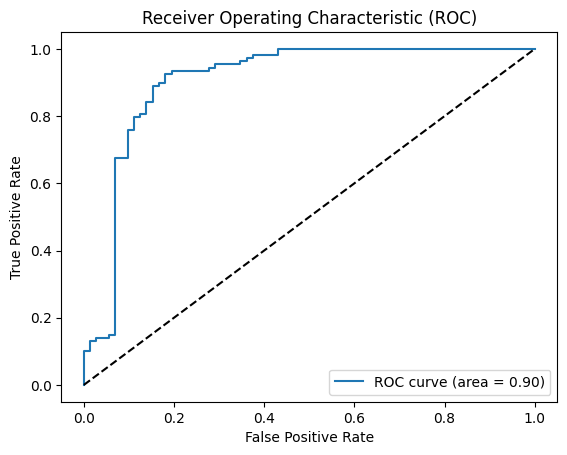

In [ ]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc  # Importing roc_curve and auc

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_test)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
# precision_curve, recall_curve, _ = precision_recall_curve(y_test_binary, y_prob_test)

import matplotlib.pyplot as plt # ensures matplotlib is imported
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# k=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

# predictions on the validation set
y_pred_val = knn.predict(X_val)

# Evaluate the model's accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy_val}")

# Make predictions on the test set
y_pred_test = knn.predict(X_test)

# Evaluate the model's accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test}")


Validation Accuracy: 0.9333333333333333
Test Accuracy: 0.9666666666666667


Model Evaluation


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score, precision_score, recall_score


# predictions on the test set
y_pred_test = knn.predict(X_test)
y_prob_test = knn.predict_proba(X_test)[:, 1]

# evaluation metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label='M')
recall = recall_score(y_test, y_pred_test, pos_label='M')

# AUC and AUPR
y_test_binary = (y_test == 'M').astype(int)
auc_roc = roc_auc_score(y_test_binary, y_prob_test)
aupr = average_precision_score(y_test_binary, y_prob_test)

results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy, precision, recall, auc_roc, aupr, tp, tn, fp, fn]
})

print(results_df)

           Metric       Value
0        Accuracy    0.966667
1       Precision    0.947368
2          Recall    1.000000
3         AUC-ROC    0.996142
4            AUPR    0.995605
5   True Positive  108.000000
6   True Negative   66.000000
7  False Positive    6.000000
8  False Negative    0.000000


ROC Curve


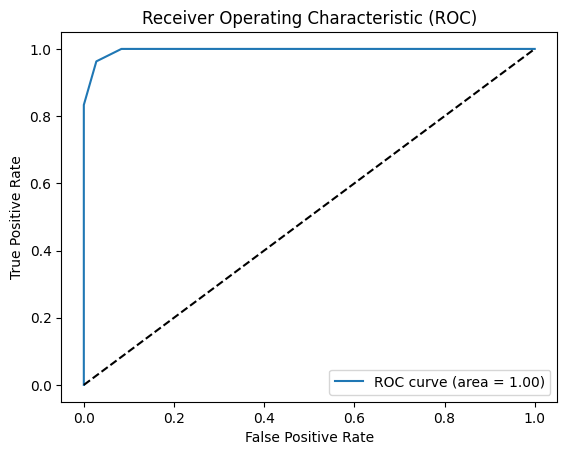

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_test)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
# precision_curve, recall_curve, _ = precision_recall_curve(y_test_binary, y_prob_test)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the training data
rf.fit(X_train, y_train)

# predictions on the validation set
y_pred_val_rf = rf.predict(X_val)

# accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy (Random Forest): {accuracy_val}")

# predictions on the test set
y_pred_test_rf = rf.predict(X_test)

# accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy (Random Forest): {accuracy_test}")


Validation Accuracy (Random Forest): 0.9333333333333333
Test Accuracy (Random Forest): 0.9666666666666667


Model Evaluation

In [ ]:
y_pred_test_rf = rf.predict(X_test)
y_prob_test_rf = rf.predict_proba(X_test)[:, 1]

# evaluation metrics
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_test_rf).ravel()
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
precision_rf = precision_score(y_test, y_pred_test_rf, pos_label='M')
recall_rf = recall_score(y_test, y_pred_test_rf, pos_label='M')
auc_roc_rf = roc_auc_score(y_test_binary, y_prob_test_rf)
aupr_rf = average_precision_score(y_test_binary, y_prob_test_rf)


results_rf_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy_rf, precision_rf, recall_rf, auc_roc_rf, aupr_rf, tp_rf, tn_rf, fp_rf, fn_rf]
})

print("\nRandom Forest Results:")
print(results_rf_df)


Random Forest Results:
           Metric  Value
0        Accuracy    1.0
1       Precision    1.0
2          Recall    1.0
3         AUC-ROC    1.0
4            AUPR    1.0
5   True Positive  108.0
6   True Negative   72.0
7  False Positive    0.0
8  False Negative    0.0


ROC Curve

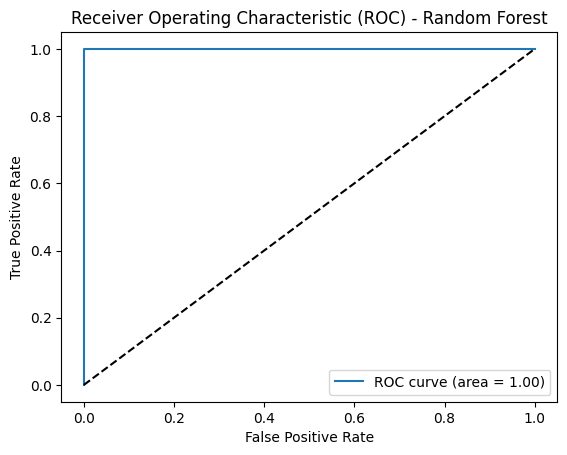

In [ ]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, y_prob_test_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
# precision_curve_rf, recall_curve_rf, _ = precision_recall_curve(y_test_binary, y_prob_test_rf)


XG Boost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the target variable to numerical values
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9944444444444445


Model Evaluation


In [ ]:
# XGBoost Model Evaluation
y_prob_test_xgb = model.predict_proba(X_test)[:, 1]

# evaluation metrics
tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix(y_test, y_pred).ravel()
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
auc_roc_xgb = roc_auc_score(y_test, y_prob_test_xgb)
aupr_xgb = average_precision_score(y_test, y_prob_test_xgb)

results_xgb_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy_xgb, precision_xgb, recall_xgb, auc_roc_xgb, aupr_xgb, tp_xgb, tn_xgb, fp_xgb, fn_xgb]
})

print("\nXGBoost Results:")
results_xgb_df



XGBoost Results:


,Metric,Value
0,Accuracy,0.994444
1,Precision,0.990826
2,Recall,1.000000
3,AUC-ROC,0.999100
4,AUPR,0.999393
5,True Positive,108.000000
6,True Negative,71.000000
7,False Positive,1.000000
8,False Negative,0.000000


ROC Curve

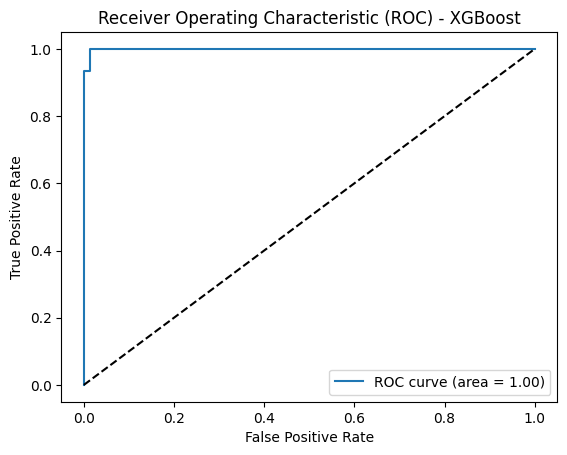

In [ ]:
# XGBoost ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_test_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_xgb, tpr_xgb, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - XGBoost')
plt.legend(loc="lower right")
plt.show()


Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the model on the training data
gb.fit(X_train, y_train) # y_train is already numerically encoded

# predictions on the validation set
y_pred_val_gb = gb.predict(X_val)

# accuracy on the validation set
# Assuming y_val needs to be numerically encoded if it's not already
# y_val_encoded = le.transform(y_val)
accuracy_val = accuracy_score(y_val, y_pred_val)  # Use original y_val if it's encoded
print(f"Validation Accuracy (Gradient Boosting): {accuracy_val}")

# predictions on the test set
y_pred_test_gb = gb.predict(X_test)

# model's accuracy on the test set
# Use the numerically encoded y_test (same as used for XGBoost)
accuracy_test = accuracy_score(y_test, y_pred_test_gb)
print(f"Test Accuracy (Gradient Boosting): {accuracy_test}")

Validation Accuracy (Gradient Boosting): 0.9333333333333333
Test Accuracy (Gradient Boosting): 0.9555555555555556


Model Evaluation

In [ ]:
# predictions on the test set for Gradient Boosting
y_pred_test_gb = gb.predict(X_test)
y_prob_test_gb = gb.predict_proba(X_test)[:, 1]

# evaluation metrics
tn_gb, fp_gb, fn_gb, tp_gb = confusion_matrix(y_test, y_pred_test_gb).ravel()
accuracy_gb = accuracy_score(y_test, y_pred_test_gb)
precision_gb = precision_score(y_test, y_pred_test_gb, pos_label=1) # Changed pos_label to 1
recall_gb = recall_score(y_test, y_pred_test_gb, pos_label=1)       # Changed pos_label to 1
auc_roc_gb = roc_auc_score(y_test_binary, y_prob_test_gb)
aupr_gb = average_precision_score(y_test_binary, y_prob_test_gb)

results_gb_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy_gb, precision_gb, recall_gb, auc_roc_gb, aupr_gb, tp_gb, tn_gb, fp_gb, fn_gb]
})

print("\nGradient Boosting Results:")
print(results_gb_df)


Gradient Boosting Results:
           Metric       Value
0        Accuracy    0.955556
1       Precision    0.971698
2          Recall    0.953704
3         AUC-ROC    0.996528
4            AUPR    0.997703
5   True Positive  103.000000
6   True Negative   69.000000
7  False Positive    3.000000
8  False Negative    5.000000


ROC Curve

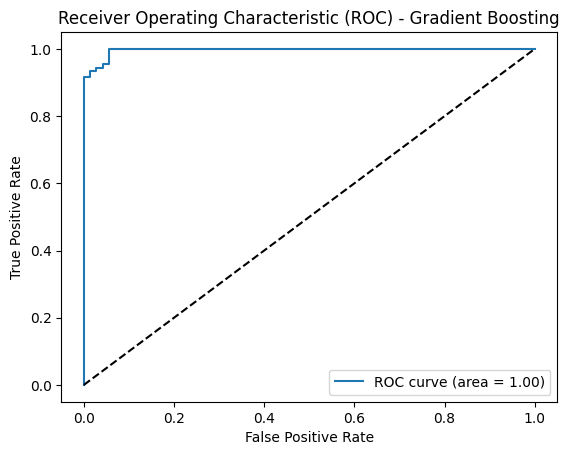

In [ ]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test_binary, y_prob_test_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.plot(fpr_gb, tpr_gb, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
# precision_curve_gb, recall_curve_gb, _ = precision_recall_curve(y_test_binary, y_prob_test_gb)

Stacking

Accuracy of StackingClassifier: 1.0

Stacking Results:
           Metric  Value
0        Accuracy    1.0
1       Precision    1.0
2          Recall    1.0
3         AUC-ROC    1.0
4            AUPR    1.0
5   True Positive  108.0
6   True Negative   72.0
7  False Positive    0.0
8  False Negative    0.0


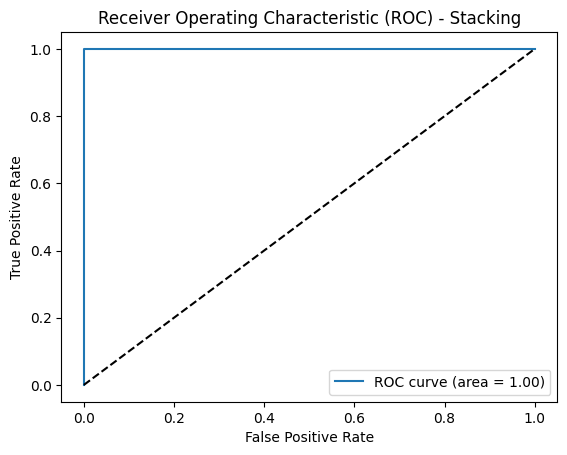

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define the base estimators
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier())

]

# Define the meta-learner
meta_learner = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test)
y_prob_stacking = stacking_model.predict_proba(X_test)[:, 1]

# Evaluate the stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of StackingClassifier: {accuracy_stacking}")

#Further evaluation metrics can be added here similar to what's done for individual models
#e.g., confusion matrix, precision, recall, AUC-ROC, etc.
tn_stack, fp_stack, fn_stack, tp_stack = confusion_matrix(y_test, y_pred_stacking).ravel()
precision_stack = precision_score(y_test, y_pred_stacking)
recall_stack = recall_score(y_test, y_pred_stacking)
auc_roc_stack = roc_auc_score(y_test, y_prob_stacking)
aupr_stack = average_precision_score(y_test, y_prob_stacking)

results_stack_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy_stacking, precision_stack, recall_stack, auc_roc_stack, aupr_stack, tp_stack, tn_stack, fp_stack, fn_stack]
})

print("\nStacking Results:")
print(results_stack_df)

# ROC Curve for Stacking
fpr_stack, tpr_stack, thresholds_stack = roc_curve(y_test, y_prob_stacking)
roc_auc_stack = auc(fpr_stack, tpr_stack)

plt.plot(fpr_stack, tpr_stack, label='ROC curve (area = %0.2f)' % roc_auc_stack)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Stacking')
plt.legend(loc="lower right")
plt.show()


##Voting


Accuracy of VotingClassifier: 1.0

Voting Results:
           Metric  Value
0        Accuracy    1.0
1       Precision    1.0
2          Recall    1.0
3         AUC-ROC    1.0
4            AUPR    1.0
5   True Positive  108.0
6   True Negative   72.0
7  False Positive    0.0
8  False Negative    0.0


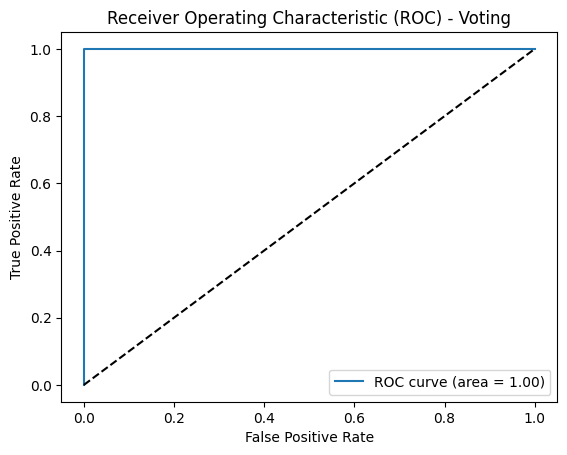

In [ ]:

from sklearn.ensemble import VotingClassifier

# Define the individual classifiers
estimators = [
    ('knn', knn),
    ('lr', logistic_regression),
    ('rf', rf),
    ('gb', gb),
    ('xgb', model)
]

# Create the voting classifier
voting_classifier = VotingClassifier(estimators=estimators, voting='soft')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_classifier.predict(X_test)
y_prob_voting = voting_classifier.predict_proba(X_test)[:, 1]

# Evaluate the voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy of VotingClassifier: {accuracy_voting}")

# Calculate other metrics
tn_voting, fp_voting, fn_voting, tp_voting = confusion_matrix(y_test, y_pred_voting).ravel()
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
auc_roc_voting = roc_auc_score(y_test, y_prob_voting)
aupr_voting = average_precision_score(y_test, y_prob_voting)

results_voting_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUPR', 'True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'Value': [accuracy_voting, precision_voting, recall_voting, auc_roc_voting, aupr_voting, tp_voting, tn_voting, fp_voting, fn_voting]
})

print("\nVoting Results:")
print(results_voting_df)

# ROC Curve
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_prob_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)

plt.plot(fpr_voting, tpr_voting, label='ROC curve (area = %0.2f)' % roc_auc_voting)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Voting')
plt.legend(loc="lower right")
plt.show()


PREDICTION MODEL

In [ ]:
def predict_prostate_cancer():
  """Predicts prostate cancer presence based on user input."""

  # Get user input for features
  radius = float(input("Enter radius: "))
  texture = float(input("Enter texture: "))
  perimeter = float(input("Enter perimeter: "))
  area = float(input("Enter area: "))
  smoothness = float(input("Enter smoothness: "))
  compactness = float(input("Enter compactness: "))
  symmetry = float(input("Enter symmetry: "))
  fractal_dimension = float(input("Enter fractal_dimension: "))

  # Create a new data point with user input
  new_data = [[radius, texture, perimeter, area, smoothness, compactness, symmetry, fractal_dimension]]

  # Scale the new data point
  new_data = scaler.transform(new_data)

  # Make prediction using the best performing model (you can change this)
  prediction = nb_model.predict(new_data)[0]

  if prediction == "M":
    print("Prostate cancer is likely present.")
  else:
    print("Prostate cancer is likely not present.")

# Example usage:
predict_prostate_cancer()
